<a href="https://colab.research.google.com/github/yingzibu/PBPK/blob/main/MSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tsong, Yi, et al. "Statistical assessment of mean differences between two dissolution data sets." Drug Information Journal 30.4 (1996): 1105-1112.

https://search.r-project.org/CRAN/refmans/disprofas/html/mimcr.html


http://forum.bebac.at/mix_entry.php?id=12382

## Single time point dissolution value

For most IR drug products, the dissolution is rapid and the quality control dissolution requirement is only a single time point.


12 tablets of test and reference:

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
test_batch = [76.5, 79.6, 82.1, 78.9, 81.5, 77.6, 79.8, 83.4, 80.2, 75.8, 81.2, 80.5]
ref_batch  = [85.3, 83.5, 82.5, 81.4, 84.4, 79.0, 80.5, 78.5, 85.3, 81.5, 79.9, 83.2]
assert len(test_batch) == len(ref_batch)

In [ ]:

# Should not use np.std default
def cal_std(l:list):
    mean_ = np.mean(l)
    # len_ = len(l)
    temp_list = [(i-mean_ )**2 for i in l]
    std_ = np.sqrt(sum(temp_list)/(len(l)-1))
    return std_

test_mean = np.mean(test_batch)
test_std  = np.std(test_batch, ddof=1)

ref_mean  = np.mean(ref_batch)
ref_std   = np.std(ref_batch, ddof=1)
test_mean, test_std

(79.75833333333334, 2.2625240665051845)

In [ ]:
D = np.abs(ref_mean-test_mean)
stderr_D = np.sqrt((ref_std**2 + test_std**2)/(len(test_batch)-1))
freedom = 2 * len(test_batch) - 2

stderr_D

0.980073505985641

t 95 22 = 1.717 check t distribution table

The 90% confidence interval of D would be the interval that contains all the differences $\mu_1 - \mu_2$ such that

$$|\frac{\mu_1 - \mu_2 - D}{stderr(d)}| \leq t22.95$$

In [ ]:
t = 1.717
L90 = D - t * stderr_D
U90 = D + t * stderr_D

L90, U90

(0.642213790222643, 4.0077862097773345)

## Multiple time point dissolution

In [ ]:
ref_df = pd.DataFrame()
ref_df['5'] = pd.DataFrame([42.06, 44.16, 45.63, 48.52, 50.49, 49.77])
ref_df['10'] = pd.DataFrame([59.91, 60.18, 55.77, 60.39, 61.82, 62.73])
ref_df['15'] = pd.DataFrame([65.58, 67.17, 65.56, 66.51, 69.06, 69.77])
ref_df['20'] = pd.DataFrame([71.81, 70.82, 70.50, 73.06, 72.85, 72.88])
ref_df['30'] = pd.DataFrame([77.77, 76.11, 76.92, 78.54, 78.99, 80.18])
ref_df['60'] = pd.DataFrame([85.67, 83.27, 83.91, 84.99, 86.86, 84.20])
ref_df['90'] = pd.DataFrame([93.14, 88.01, 86.83, 88.00, 89.70, 88.88])
ref_df['120'] = pd.DataFrame([94.23, 89.59, 90.12, 93.43, 90.79, 90.47])
ref_df, ref_df.mean(axis=0)

(       5     10     15     20     30     60     90    120
 0  42.06  59.91  65.58  71.81  77.77  85.67  93.14  94.23
 1  44.16  60.18  67.17  70.82  76.11  83.27  88.01  89.59
 2  45.63  55.77  65.56  70.50  76.92  83.91  86.83  90.12
 3  48.52  60.39  66.51  73.06  78.54  84.99  88.00  93.43
 4  50.49  61.82  69.06  72.85  78.99  86.86  89.70  90.79
 5  49.77  62.73  69.77  72.88  80.18  84.20  88.88  90.47,
 5      46.771667
 10     60.133333
 15     67.275000
 20     71.986667
 30     78.085000
 60     84.816667
 90     89.093333
 120    91.438333
 dtype: float64)

In [ ]:
test_df = pd.DataFrame()
test_df['5'] = pd.DataFrame([19.99, 22.08, 21.93, 22.44, 25.67, 26.37])
test_df['10'] = pd.DataFrame([36.70, 39.29, 38.54, 38.46, 42.35, 41.34])
test_df['15'] = pd.DataFrame([47.77, 49.46, 47.76, 49.72, 52.68, 51.01])
test_df['20'] = pd.DataFrame([55.08, 56.79, 55.14, 58.67, 59.71, 57.75])
test_df['30'] = pd.DataFrame([65.69, 67.22, 65.25, 69.21, 71.51, 69.44])
test_df['60'] = pd.DataFrame([81.37, 82.42, 83.49, 84.93, 86.61, 85.90])
test_df['90'] = pd.DataFrame([92.39, 89.93, 90.19, 94.12, 93.80, 94.45])
test_df['120'] = pd.DataFrame([97.10, 95.62, 95.62, 95.51, 96.70, 98.07])
test_df, test_df.mean(axis=0)

(       5     10     15     20     30     60     90    120
 0  19.99  36.70  47.77  55.08  65.69  81.37  92.39  97.10
 1  22.08  39.29  49.46  56.79  67.22  82.42  89.93  95.62
 2  21.93  38.54  47.76  55.14  65.25  83.49  90.19  95.62
 3  22.44  38.46  49.72  58.67  69.21  84.93  94.12  95.51
 4  25.67  42.35  52.68  59.71  71.51  86.61  93.80  96.70
 5  26.37  41.34  51.01  57.75  69.44  85.90  94.45  98.07,
 5      23.080000
 10     39.446667
 15     49.733333
 20     57.190000
 30     68.053333
 60     84.120000
 90     92.480000
 120    96.436667
 dtype: float64)

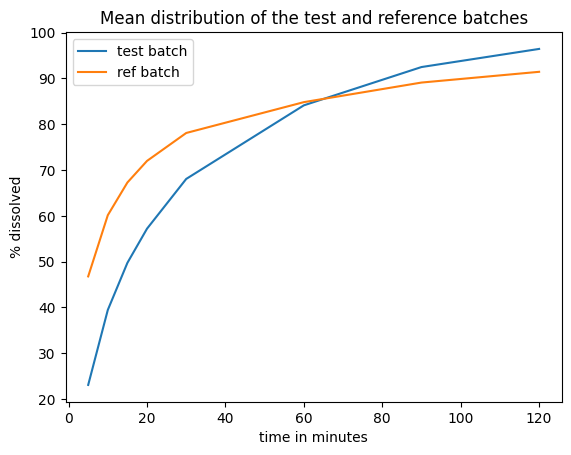

In [ ]:
import matplotlib.pyplot as plt

x_axis = [int(i) for i in list(ref_df.columns)]
test_axis = list(test_df.mean(axis=0))
ref_axis = list(ref_df.mean(axis=0))
plt.plot(x_axis, test_axis, label='test batch')
plt.plot(x_axis, ref_axis, label='ref batch')
plt.xlabel('time in minutes')
plt.ylabel('% dissolved')
plt.title('Mean distribution of the test and reference batches')
plt.legend()
plt.show()
plt.close()

### comparing 15min and 90 min sample time points only

In [ ]:
time_points = ['15', '90']
P = len(time_points)
n = len(ref_df) # there are a total of 6 time points, but we only compare 2 time points
S1 = ref_df.cov()
S2 = test_df.cov()
S_pooled = (S1 + S2) / 2
S_pooled

,5,10,15,20,30,60,90,120
5,8.600908,4.448457,4.344905,3.004123,4.254885,2.981463,0.036347,-0.229818
10,4.448457,5.012247,3.535987,2.515637,3.282827,2.377407,1.777713,0.576357
15,4.344905,3.535987,3.395808,2.233850,3.157388,1.895300,1.029870,-0.396778
20,3.004123,2.515637,2.233850,2.396693,2.949900,2.064523,1.583467,0.514407
30,4.254885,3.282827,3.157388,2.949900,4.011988,2.617250,2.105510,0.610332
60,2.981463,2.377407,1.895300,2.064523,2.617250,2.940193,2.250947,0.894497
90,0.036347,1.777713,1.029870,1.583467,2.105510,2.250947,4.434833,1.985733
120,-0.229818,0.576357,-0.396778,0.514407,0.610332,0.894497,1.985733,2.364222


However, in the R reference
$S_{pooled} = \frac{(n_R-1)S_R + (n_T-1)S_T}{n_R + n_T -2}$

In [ ]:
x2_x1 = list(test_df.mean(axis=0)[time_points] - ref_df.mean(axis=0)[time_points])
a = np.array(x2_x1).reshape(len(time_points),1)

In [ ]:
K = n**2/(2*n)* (2*n - P - 1) / ((2*n - 2) * P)
K

1.35

F distribution with degrees P and 2n-P-1, 90 percentile

In [ ]:
# F_2_9_90 = 3.0065

# Determine the F critical value
Fcrit = scipy.stats.f.ppf(q=1-.1, dfn=P, dfd=2*n-P-1)

In [ ]:
spinv = np.linalg.inv(S_pooled.loc[time_points , time_points])
D_M = np.sqrt(a.T @ spinv @ a)[0][0]
D_M

10.440448914919306

In [ ]:
# Assume tolerance is 15%

D_g = np.array([15] * len(time_points)).reshape(len(time_points), 1)
RD = np.sqrt(D_g.T @ spinv @ D_g)[0][0]
RD

9.630776502154019

$CR = K(y-a)^\top S_{pooled}^{-1} (y-a) \leq F$, a is the test-ref difference

let $M = S^{-1}_{pooled}$

the aim is to calculate the upper and lower bound for $\sqrt{ y^\top M y}$,
which is the same as to find the optimum for $y^\top M y$

Use Lagrange Multiplier method:

\begin{*align}
    L(y, \lambda) &= y^\top M y - \lambda ((y-a)^\top M (y-a) - F/K) \\
    \frac{\partial L}{\partial y} & = 2 M y - \lambda (2My-2Ma) = 0 \\
    y & = \frac{\lambda a}{\lambda - 1} = (1 + \frac{1}{\lambda - 1})a  
\end{*align}
Apply back to CR equation
\begin{*align}
    y - a & = \frac{1}{\lambda - 1} a \\
    (\frac{1}{\lambda - 1} a)^\top M \frac{1}{\lambda - 1} a & = \frac{F}{K} \\
    (\frac{1}{\lambda - 1})^2 a^\top M a &= \frac{F}{K} \\
    \frac{1}{\lambda - 1} & = \pm \sqrt{\frac{F}{Ka^\top Ma}} \\
    then \quad y & = a(1 \pm \sqrt{\frac{F}{Ka^\top Ma}})  
\end{*align}
which is the bound1 and bound2 calculated below

In [ ]:
bound1 = a @ (1 + np.sqrt(Fcrit/(K * a.T @ spinv @ a)))
bound2 = a @ (1 - np.sqrt(Fcrit/(K * a.T @ spinv @ a)))
# 90% CI of Mahalanobis distance:
DM_1 = np.sqrt(bound1.T @ spinv @ bound1)[0][0]
DM_2 = np.sqrt(bound2.T @ spinv @ bound2)[0][0]
DM_upper = max(DM_1, DM_2)
if DM_upper <= RD:
    print('Similar')
else:
    print('not similar')

not similar


### Comparing all eight time points

In [96]:
time_points = list(ref_df.columns)
P = len(time_points)
n = len(ref_df)
S1 = ref_df.cov()
S2 = test_df.cov()
S_pooled = (S1 + S2) / 2
x2_x1 = list(test_df.mean(axis=0)[time_points] - ref_df.mean(axis=0)[time_points])
a = np.array(x2_x1).reshape(len(time_points), 1)
K = n**2/(2*n)* (2*n - P - 1) / ((2*n - 2) * P)
Fcrit = scipy.stats.f.ppf(q=1-.1, dfn=P, dfd=2*n-P-1)
spinv = np.linalg.inv(S_pooled.loc[time_points , time_points])
D_M = np.sqrt(a.T @ spinv @ a)[0][0]
print('Mahalanobis distance between T and R:', D_M)
# Assume tolerance is 15%
D_g = np.array([15] * len(time_points)).reshape(len(time_points), 1)

RD = np.sqrt(D_g.T @ spinv @ D_g)[0][0]
bound1 = a @ (1 + np.sqrt(Fcrit/(K * a.T @ spinv @ a)))
bound2 = a @ (1 - np.sqrt(Fcrit/(K * a.T @ spinv @ a)))
# 90% CI of Mahalanobis distance:
DM_1 = np.sqrt(bound1.T @ spinv @ bound1)[0][0]
DM_2 = np.sqrt(bound2.T @ spinv @ bound2)[0][0]
DM_upper = max(DM_1, DM_2)
DM_lower = min(DM_1, DM_2)
print('upper bound of DM:', DM_upper)
print('Maximum Mahalanobis distance at 15% tolerance:', RD)
if DM_upper <= RD:
    print('Similar')
else:
    print('not similar')

Mahalanobis distance between T and R: 26.07918991319184
upper bound of DM: 32.91157754304976
Maximum Mahalanobis distance at 15% tolerance: 32.357455388854085
not similar
